<a href="https://colab.research.google.com/github/ranzan97/Exploratory-Data-Analysis/blob/main/California_Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/amankharwal/Californai-Cities/master/california_cities.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [4]:
# Extract relevant columns
latitude, longitude = df['latd'], df['longd']
population, area = df['population_total'], df['area_total_km2']

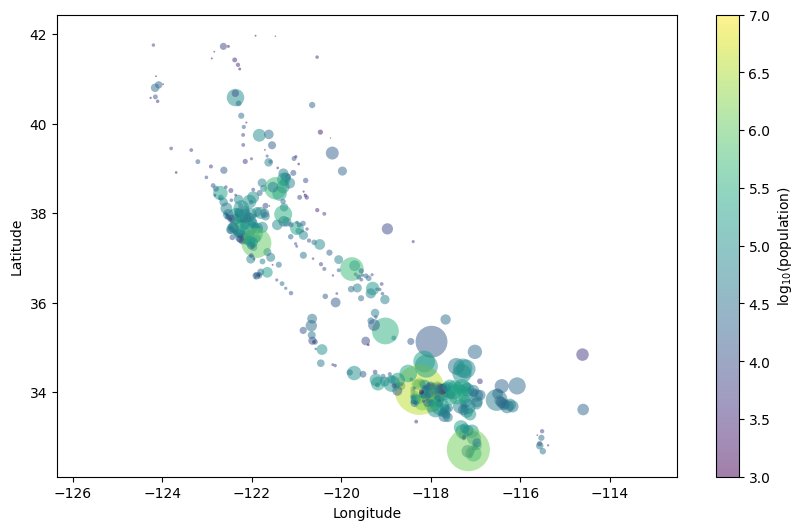

In [5]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, label=None, c=np.log10(population),
            cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.xlabel('Longitude')
plt.ylabel('Latitude')  # Fixed typo here
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)  # Set color bar limits

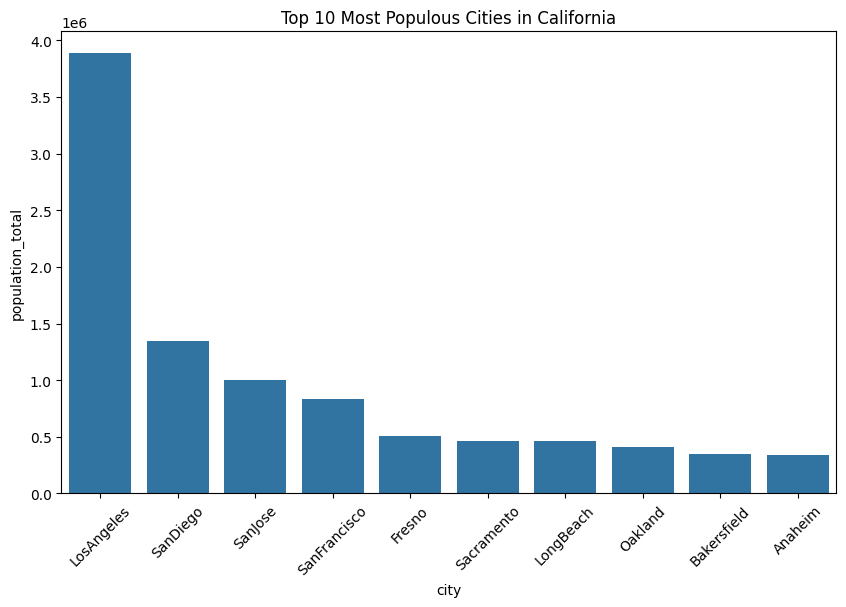

In [16]:
# Top 10 most populous cities
top_10_cities = df.nlargest(10, 'population_total')
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='population_total', data=top_10_cities)
plt.title('Top 10 Most Populous Cities in California')
plt.xticks(rotation=45)
plt.show()

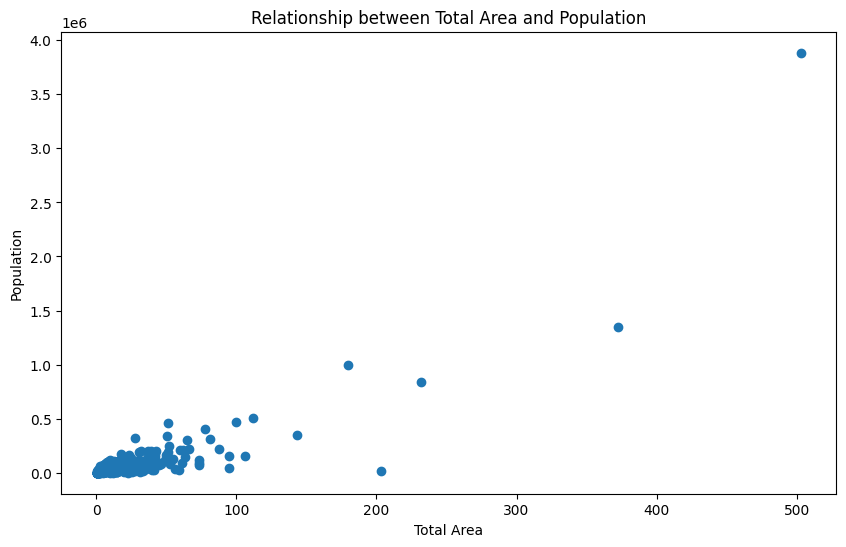

In [18]:
# Relationship between total_area and population
plt.figure(figsize=(10, 6))
plt.scatter(df['area_total_sq_mi'], df['population_total'])
plt.title('Relationship between Total Area and Population')
plt.xlabel('Total Area')
plt.ylabel('Population')
plt.show()

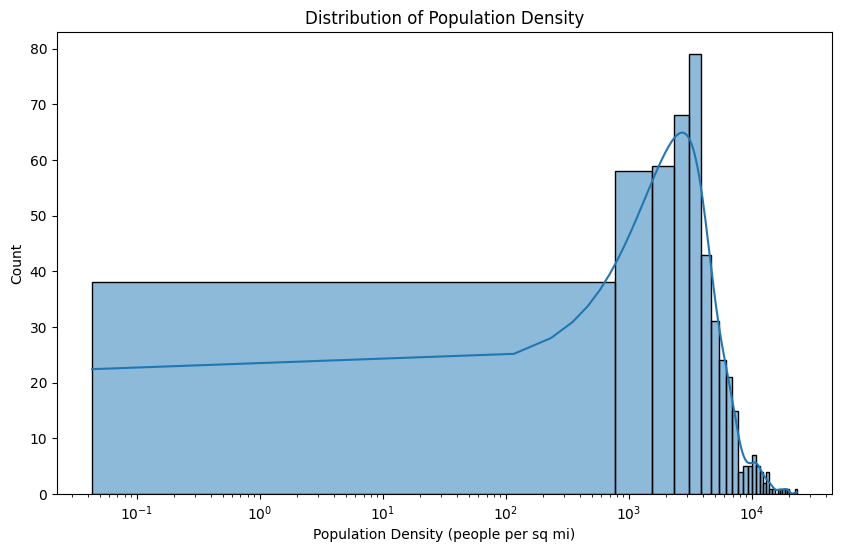

In [19]:
# Population density
df['population_density'] = df['population_total'] / df['area_total_sq_mi']
plt.figure(figsize=(10, 6))
sns.histplot(df['population_density'], kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density (people per sq mi)')
plt.xscale('log')
plt.show()

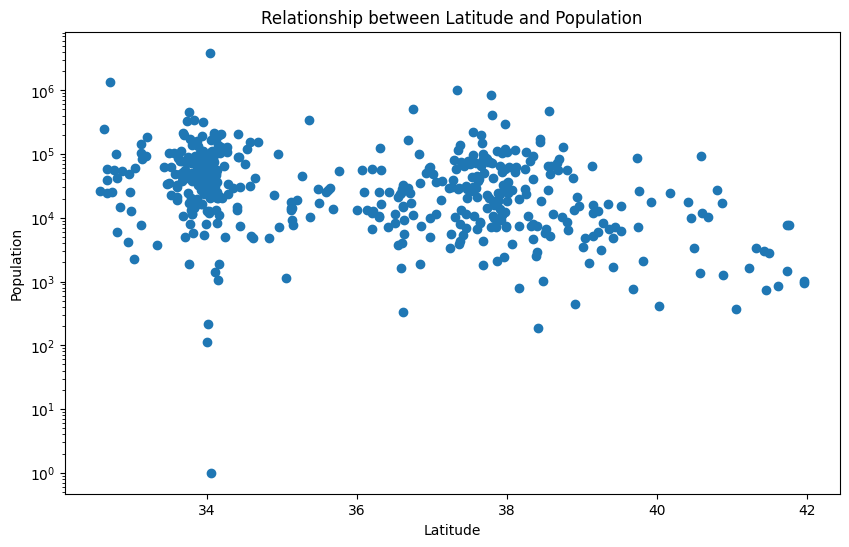

In [20]:
# Relationship between latitude and population
plt.figure(figsize=(10, 6))
plt.scatter(df['latd'], df['population_total'])
plt.title('Relationship between Latitude and Population')
plt.xlabel('Latitude')
plt.ylabel('Population')
plt.yscale('log')
plt.show()

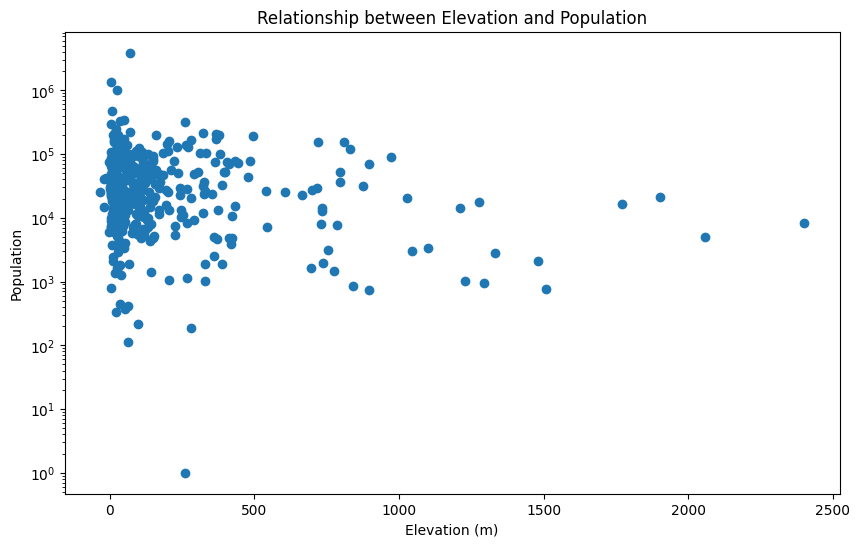

In [21]:
# Analyze city elevations
plt.figure(figsize=(10, 6))
plt.scatter(df['elevation_m'], df['population_total'])
plt.title('Relationship between Elevation and Population')
plt.xlabel('Elevation (m)')
plt.ylabel('Population')
plt.yscale('log')
plt.show()